In [3]:
import torch
import numpy as np 
from torch.utils.data import Dataset
import os
from PIL import Image
import pandas as pd
from collections import defaultdict

In [4]:
class HAM10000Dataset(Dataset):
    def __init__(self, csv_file, image_dir1, image_dir2, transform=None):
        super().__init__()
        self.df = pd.read_csv(csv_file)
        self.image_dir1 = image_dir1
        self.image_dir2 = image_dir2
        self.transform = transform
        # self.images = os.listdir(self.df)
        dct = defaultdict(list)

        for i, label in enumerate(self.df.dx):
            dct[label].append(i)

        dct = {key: np.array(val) for key, val in dct.items()}
        new_df = pd.DataFrame(np.zeros((self.df.shape[0], len(dct.keys())), dtype=np.int8), columns=dct.keys())

        for key, val in dct.items():
            new_df.loc[val, key] = 1

        self.new_df = new_df

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        image_path = os.path.join(self.image_dir1, f'{self.df.iloc[index, 1]}.jpg')
        try:
            Image.open(image_path)
        except:
            image_path = os.path.join(self.image_dir2, f'{self.df.iloc[index, 1]}.jpg')
            
        image = np.array(Image.open(image_path).convert('RGB'))
        label = torch.tensor(self.new_df.iloc[index, :])

        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
from collections import defaultdict

In [6]:
abc = pd.read_csv('HAM10000_metadata.csv')
abc.dx
dct = defaultdict(list)

for i, label in enumerate(abc.dx):
    dct[label].append(i)

dct = {key: np.array(val) for key, val in dct.items()}
new_df = pd.DataFrame(np.zeros((abc.shape[0], len(dct.keys())), dtype=np.int8), columns=dct.keys())

for key, val in dct.items():
    new_df.loc[val, key] = 1

In [7]:
dct.items()

dict_items([('bkl', array([   0,    1,    2, ..., 9546, 9630, 9631])), ('nv', array([  64, 1210, 2976, ..., 9684, 9685, 9686])), ('df', array([1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,
       1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127,
       1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138,
       1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149,
       1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160,
       1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171,
       1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182,
       1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204,
       1205, 1206, 1207, 1208, 1209])), ('mel', array([ 1211,  1212,  1213, ...,  8820,  8834, 10014])), ('vasc', array([2320, 2321, 2

In [8]:
new_df.head()

,bkl,nv,df,mel,vasc,bcc,akiec
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [9]:
label = torch.tensor(new_df.iloc[1211, :])
label

tensor([0, 0, 0, 1, 0, 0, 0], dtype=torch.int8)

In [10]:
dataset = HAM10000Dataset('HAM10000_metadata.csv', 'HAM10000_images_part_1', 'HAM10000_images_part_2')

In [11]:
image, label = dataset.__getitem__(1211)
image, label

(array([[[120,  99, 104],
         [125, 102, 108],
         [128, 103, 107],
         ...,
         [ 82,  69,  76],
         [ 78,  67,  75],
         [ 77,  64,  73]],
 
        [[122, 103, 105],
         [128, 103, 109],
         [129, 102, 107],
         ...,
         [ 86,  73,  82],
         [ 82,  69,  78],
         [ 82,  69,  76]],
 
        [[120, 106, 105],
         [127, 107, 109],
         [130, 105, 108],
         ...,
         [ 89,  76,  85],
         [ 84,  71,  80],
         [ 80,  69,  75]],
 
        ...,
 
        [[ 84,  69,  72],
         [ 82,  71,  75],
         [ 89,  77,  79],
         ...,
         [ 17,  16,  24],
         [ 20,  15,  22],
         [ 24,  14,  22]],
 
        [[ 80,  65,  70],
         [ 82,  67,  70],
         [ 84,  72,  72],
         ...,
         [ 19,  14,  21],
         [ 24,  14,  22],
         [ 23,  13,  21]],
 
        [[ 78,  61,  67],
         [ 81,  64,  70],
         [ 83,  68,  73],
         ...,
         [ 20,  15,  22],
  

In [26]:
import matplotlib.pyplot as plt

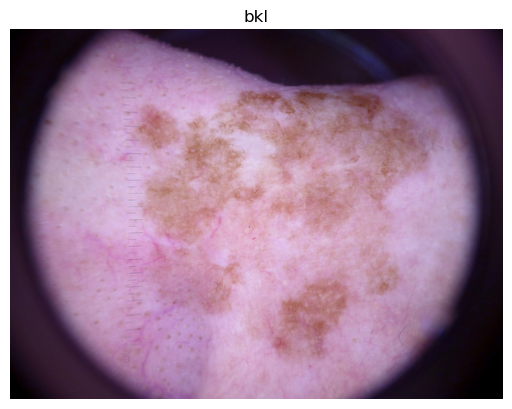

In [27]:
plt.imshow(image)
plt.axis('off')
plt.title(label=label)
plt.show()

In [13]:
from torch.utils.data import DataLoader

In [15]:
data_loader = DataLoader(dataset, batch_size=64).to('cuda')
data_loader = data_loader.to('cuda')

AttributeError: 'DataLoader' object has no attribute 'to'